# Double Jet

Example how to set up dj with KL model error on a very fine resolution

In [1]:
from gpuocean.SWEsimulators import ModelErrorKL, CDKLM16
from gpuocean.utils import Common, IPythonMagic

from importlib import reload

import numpy as np
import pycuda.driver as cuda
from matplotlib import pyplot as plt

plt.rcParams["lines.color"] = "w"
plt.rcParams["text.color"] = "w"
plt.rcParams["axes.labelcolor"] = "w"
plt.rcParams["xtick.color"] = "w"
plt.rcParams["ytick.color"] = "w"

plt.rcParams["image.origin"] = "lower"


In [2]:
%cuda_context_handler gpu_ctx

In [3]:
import sys, os
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '../')))

Get initial arguments from class

In [4]:
from gpuocean.utils import DoubleJetCase

In [5]:
doubleJetCase = DoubleJetCase.DoubleJetCase(gpu_ctx, DoubleJetCase.DoubleJetPerturbationType.SteadyState, 
                                            model_error=2, ny=1024, nx=2048)

In [6]:
doubleJetCase_args, doubleJetCase_init, doubleJetCase_meargs = doubleJetCase.getInitConditions()
doubleJetCase_args["dt"] = 0.0

(<Figure size 1080x720 with 6 Axes>,
 array([<AxesSubplot:title={'center':'$\\eta$'}>,
        <AxesSubplot:title={'center':'$hu$'}>,
        <AxesSubplot:title={'center':'$hv$'}>], dtype=object))

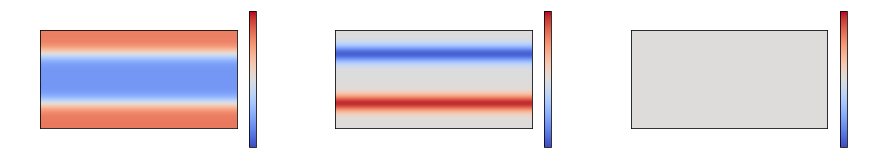

In [7]:
from utils.DoubleJetPlot import *
imshow3(list(doubleJetCase_init.values()), eta_vlim=3.5, huv_vlim=750)

Define DoubleJet sim

Set the KLModelError with strong perturbations! (Then we dont need to run simulation for long before we see chaos.) This KLModelError also uses the same stream as the simulatiion

In [8]:
sim = CDKLM16.CDKLM16(**doubleJetCase_args, **doubleJetCase_init)
sim.setKLModelError(**doubleJetCase_meargs)
sim.model_time_step = 60.0

In [9]:
sim.dataAssimilationStep(6*60*60)

(<Figure size 1080x720 with 6 Axes>,
 array([<AxesSubplot:title={'center':'$\\eta$'}>,
        <AxesSubplot:title={'center':'$hu$'}>,
        <AxesSubplot:title={'center':'$hv$'}>], dtype=object))

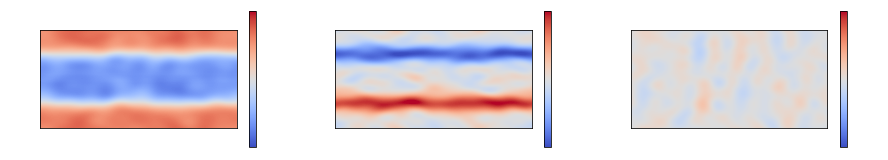

In [10]:
imshowSim(sim, eta_vlim=3.5, huv_vlim=750)

In [11]:
sim.dataAssimilationStep(12*60*60)

(<Figure size 1080x720 with 6 Axes>,
 array([<AxesSubplot:title={'center':'$\\eta$'}>,
        <AxesSubplot:title={'center':'$hu$'}>,
        <AxesSubplot:title={'center':'$hv$'}>], dtype=object))

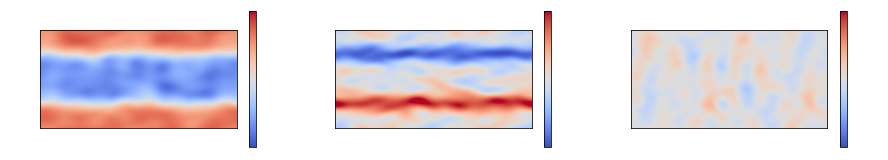

In [12]:
imshowSim(sim, eta_vlim=3.5, huv_vlim=750)

In [13]:
sim.dataAssimilationStep(18*60*60)

(<Figure size 1080x720 with 6 Axes>,
 array([<AxesSubplot:title={'center':'$\\eta$'}>,
        <AxesSubplot:title={'center':'$hu$'}>,
        <AxesSubplot:title={'center':'$hv$'}>], dtype=object))

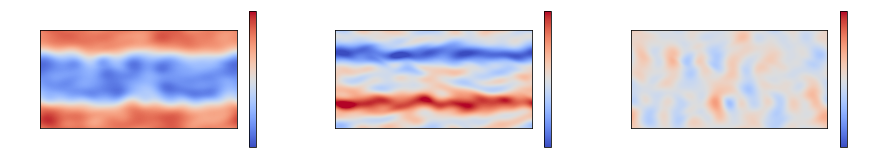

In [14]:
imshowSim(sim, eta_vlim=3.5, huv_vlim=750)

In [15]:
sim.dataAssimilationStep(24*60*60)

(<Figure size 1080x720 with 6 Axes>,
 array([<AxesSubplot:title={'center':'$\\eta$'}>,
        <AxesSubplot:title={'center':'$hu$'}>,
        <AxesSubplot:title={'center':'$hv$'}>], dtype=object))

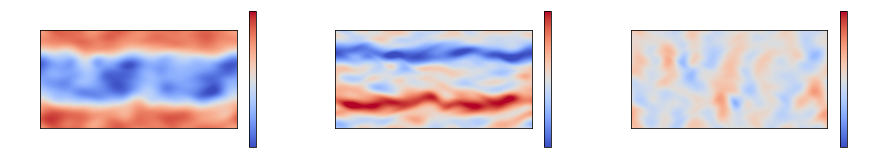

In [16]:
imshowSim(sim, eta_vlim=3.5, huv_vlim=750)